In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X_train = pd.read_csv('dataset_processed/X_train_processed.csv')
X_test = pd.read_csv('dataset_processed/X_test_processed.csv')

In [3]:
# Cargar los datos originales para obtener la variable objetivo
original_data = pd.read_csv('Car details v3.csv')
y = original_data['selling_price']


In [4]:
_, X_tes, y_train, y_test = train_test_split(original_data, y, test_size=0.3, random_state=42)

In [5]:
# Aplicar transformación logarítmica a y
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [6]:
# Crear y entrenar el modelo CatBoost
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)


In [7]:
# Entrenar el modelo
model.fit(
    X_train, y_train_log,
    eval_set=(X_test, y_test_log),
    early_stopping_rounds=50
)

0:	learn: 0.8080294	test: 0.8077586	best: 0.8077586 (0)	total: 149ms	remaining: 2m 28s
100:	learn: 0.2206011	test: 0.2281234	best: 0.2281234 (100)	total: 356ms	remaining: 3.17s
200:	learn: 0.2018911	test: 0.2142169	best: 0.2142169 (200)	total: 538ms	remaining: 2.14s
300:	learn: 0.1907801	test: 0.2087646	best: 0.2087646 (300)	total: 729ms	remaining: 1.69s
400:	learn: 0.1823946	test: 0.2061443	best: 0.2061443 (400)	total: 906ms	remaining: 1.35s
500:	learn: 0.1757709	test: 0.2045039	best: 0.2045039 (500)	total: 1.11s	remaining: 1.1s
600:	learn: 0.1699178	test: 0.2033320	best: 0.2033219 (586)	total: 1.31s	remaining: 869ms
700:	learn: 0.1649546	test: 0.2028533	best: 0.2028424 (698)	total: 1.51s	remaining: 645ms
800:	learn: 0.1608690	test: 0.2022744	best: 0.2022744 (800)	total: 1.7s	remaining: 421ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2021761579
bestIteration = 820

Shrink model to first 821 iterations.


In [8]:
# Hacer predicciones
y_pred_log = model.predict(X_test)
# Convertir predicciones de vuelta a la escala original
y_pred = np.expm1(y_pred_log)

In [9]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 197508.67820937865
R2 Score: 0.9433707539258275


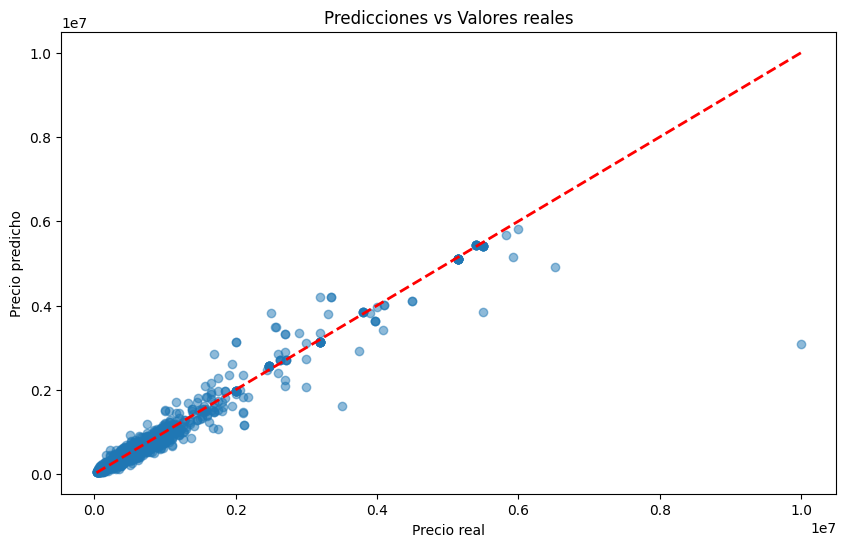

In [10]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs Valores reales')
plt.show()


In [11]:
# Analizar feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de características:")
print(feature_importance)


Importancia de características:
                         feature  importance
0                           year   39.206668
5                  max_power_bhp   25.210463
7              torque_peak_power    8.750666
4                      engine_cc    8.340725
1                      km_driven    2.976273
40                     make_Tata    2.676927
14           transmission_Manual    2.402159
6                   mileage_kmpl    2.331327
3                          seats    1.793425
8              torque_peak_speed    1.286969
2                          owner    1.053449
41                   make_Toyota    1.031332
17                make_Chevrolet    0.842720
9                    fuel_Diesel    0.340260
33                   make_Maruti    0.335353
32                 make_Mahindra    0.206321
34            make_Mercedes-Benz    0.129417
12        seller_type_Individual    0.128829
42               make_Volkswagen    0.115662
22                     make_Ford    0.093861
11                   f

# Nuevo dato

In [22]:
# Ahora ya puedes hacer la importación
import joblib
final_pipeline = joblib.load('final_pipeline.joblib')


In [19]:
X_tes.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1971,Honda City 1.5 GXI,2004,198000,110000,Petrol,Individual,Manual,Third Owner,12.8 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0


In [20]:
nuevo_dato = pd.DataFrame({
    'name': ['Honda City 1.5 GXI'], 
    'year': [2004], 
    'km_driven': [110000], 
    'fuel': ['Petrol'], 
    'seller_type': ['Individual'], 
    'transmission': ['Manual'], 
    'owner': ['Third Owner'], 
    'mileage': ['12.8 kmpl'], 
    'engine': ['1493 CC'], 
    'max_power': ['100 bhp'], 
    'torque': ['113.1kgm@ 4600rpm'], 
    'seats': [5]
})



In [23]:
# Paso 1: Procesar el nuevo dato usando el pipeline
nuevo_dato_procesado = final_pipeline.transform(nuevo_dato)





In [24]:
# Paso 2: Hacer la predicción con el modelo entrenado
prediccion = model.predict(nuevo_dato_procesado)

In [25]:
# Mostrar la predicción
print(f"La predicción para el nuevo dato es: {np.exp(prediccion[0])}")

La predicción para el nuevo dato es: 140724.21228266793


In [35]:
X_tes = X_tes.drop('selling_price',axis=1)

In [37]:
X_tes.head(4)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1971,Honda City 1.5 GXI,2004,110000,Petrol,Individual,Manual,Third Owner,12.8 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0
4664,Tata Safari Storme EX,2014,291977,Diesel,Individual,Manual,First Owner,14.0 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0
5448,Maruti Ritz VDi,2016,70000,Diesel,Individual,Manual,First Owner,23.2 kmpl,1248 CC,73.94 bhp,190Nm@ 2000rpm,5.0
3333,Honda City 2017-2020 VTEC,2006,120000,Petrol,Individual,Manual,Second Owner,16.9 kmpl,1497 CC,100 bhp,"13.5@ 4,800(kgm@ rpm)",5.0


In [40]:
X_tes.loc[[X_tes.index[1]]]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4664,Tata Safari Storme EX,2014,291977,Diesel,Individual,Manual,First Owner,14.0 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0


In [43]:
y_test.head(4)

1971    198000
4664    500000
5448    425000
3333    150000
Name: selling_price, dtype: int64

In [41]:
# Paso 1: Procesar el nuevo dato usando el pipeline
nuevo_dato_procesado2 = final_pipeline.transform(X_tes.loc[[X_tes.index[1]]])

# Paso 2: Hacer la predicción con el modelo entrenado
prediccion = model.predict(nuevo_dato_procesado2)

In [42]:
print(f"La predicción para el nuevo dato es: {np.exp(prediccion[0])}")

La predicción para el nuevo dato es: 380878.64329669694


# Cross Validation and hiperparameter

In [45]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from catboost import CatBoostRegressor

In [44]:
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0, 0.5, 1]
}

In [47]:
model = CatBoostRegressor(
    eval_metric='RMSE',
    random_seed=42,
    verbose=0  # No mostrar demasiados detalles durante la búsqueda
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [48]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # Número de combinaciones a probar (puedes ajustarlo)
    scoring='neg_root_mean_squared_error',
    cv=cv,
    verbose=1,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

random_search.fit(X_train, y_train_log)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001C25C18EC50>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.5, 1],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [500, 1000, 1500],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [49]:
print("Best Parameters:", random_search.best_params_)
print("Best RMSE Score:", -random_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 6, 'bagging_temperature': 0}
Best RMSE Score: 0.1988803047014308


In [50]:
best_model = random_search.best_estimator_
best_model.fit(
    X_train, y_train_log,
    eval_set=(X_test, y_test_log),
    early_stopping_rounds=50
)

In [51]:
# Hacer predicciones
y_pred_log = best_model.predict(X_test)
# Convertir predicciones de vuelta a la escala original
y_pred = np.expm1(y_pred_log)

In [52]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 194456.59477599934
R2 Score: 0.9451074043534708


In [ ]:
# RMSE: 197508.67820937865
# R2 Score: 0.9433707539258275

In [53]:
best_model.save_model('catboost_model.cbm')

# XGBOOST

In [57]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import xgboost as xgb

In [59]:
dtrain = xgb.DMatrix(X_train, label=y_train_log)
dtest = xgb.DMatrix(X_test, label=y_test_log)

In [60]:
# Definir los parámetros del modelo
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Entrenar el modelo
num_rounds = 1000
evallist = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(
    params,
    dtrain,
    num_rounds,
    evallist,
    early_stopping_rounds=50,
    verbose_eval=100
)

[0]	train-rmse:0.80286	eval-rmse:0.80192


c:\Users\Iñaki\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[100]	train-rmse:0.17044	eval-rmse:0.21025
[200]	train-rmse:0.15063	eval-rmse:0.20639
[294]	train-rmse:0.13850	eval-rmse:0.20545


In [61]:
# Hacer predicciones
y_pred_log = model.predict(dtest)

# Convertir predicciones de vuelta a la escala original
y_pred = np.expm1(y_pred_log)

In [62]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


RMSE: 199136.25561539378
R2 Score: 0.9424335977348047


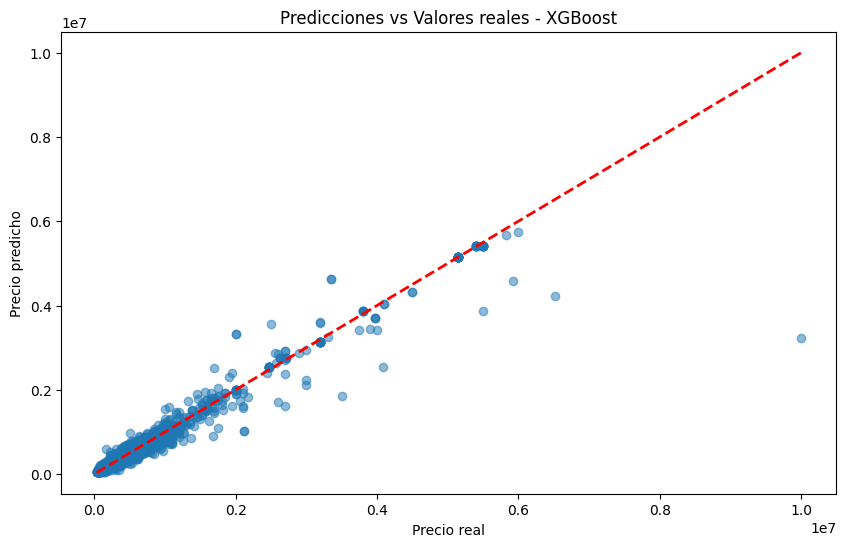

In [63]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs Valores reales - XGBoost')
plt.show()

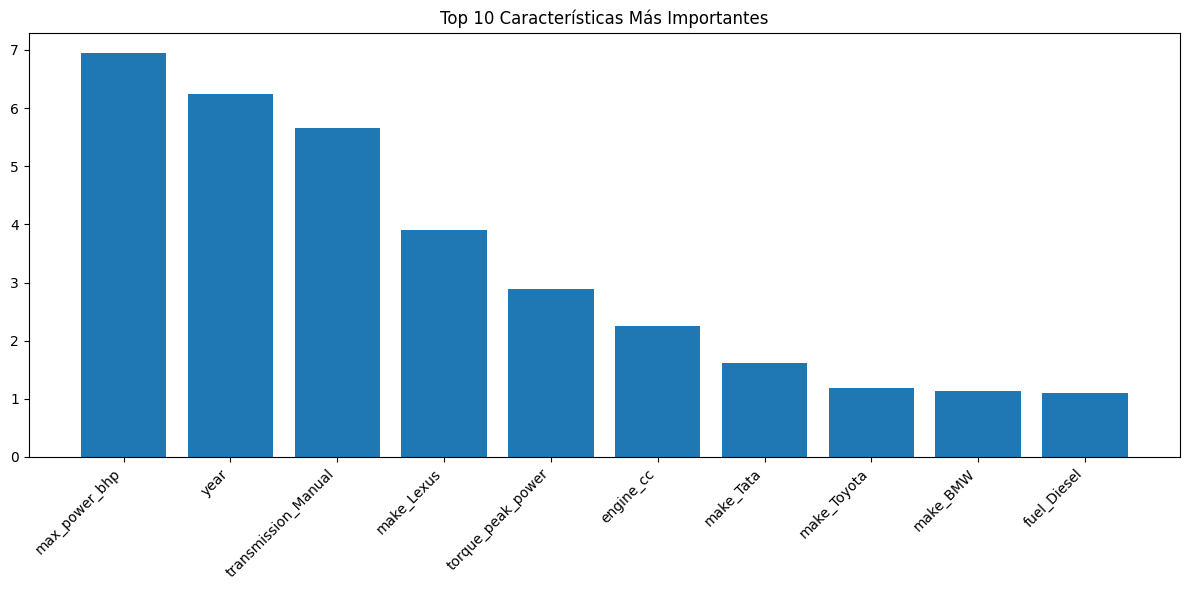

In [64]:
# Visualizar la importancia de las características
importance_scores = model.get_score(importance_type='gain')
importance_df = pd.DataFrame(
    {'feature': list(importance_scores.keys()),
     'importance': list(importance_scores.values())}
).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'][:10], importance_df['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Características Más Importantes')
plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

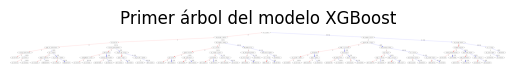

In [65]:
# Visualizar el árbol
plt.figure(figsize=(20, 10))
xgb.plot_tree(model, num_trees=0)
plt.title('Primer árbol del modelo XGBoost')
plt.show()